In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import os
import matplotlib.pyplot as plt

D:\projects\energy_safe_victoria\env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [31]:
def filter_tempdata(dataframe):
    temp_data = dataframe[12:]

    # change the column names
    temp_data.columns = ['frame_number', 'temp_C', "temp_F"]

    # reset index
    temp_data = temp_data.reset_index(drop=True)

    # remove last column
    temp_data = temp_data.drop(columns=['temp_F'])

    # remove "Frame" from the frame number and convert to int
    temp_data['frame_number'] = temp_data['frame_number'].str.replace('Frame', '').astype(int)

    #convert temp_C to float
    temp_data['temp_C'] = temp_data['temp_C'].astype(float)

    return temp_data


In [64]:
file_path = "../HYP_T_Data_Files/OneDrive_2023-01-15 (1)/All participants/High Res Thermal Camera/HYT10/"
arr = os.listdir(file_path)

In [65]:
files = [file for file in arr if file.endswith('.csv')]
print(files)

['rec_0010.csv', 'rec_0011.csv', 'rec_0012.csv', 'rec_0013.csv', 'rec_0014.csv', 'rec_0015.csv', 'rec_0016.csv', 'rec_0017.csv', 'rec_0018.csv']


In [66]:
data = list()
for i in files:
    data.append(filter_tempdata(pd.read_csv(file_path+i)))

In [67]:
data[5]

,frame_number,temp_C
0,1,35.805
1,2,35.786
2,3,35.768
3,4,35.768
4,5,35.712
...,...,...
259,260,35.740
260,261,35.745
261,262,35.726
262,263,35.786


In [68]:
stages = ["stage1","stage2","stage3","stage4","stage5","stage6"]
df = pd.concat([x["temp_C"] for x in data], axis=1)

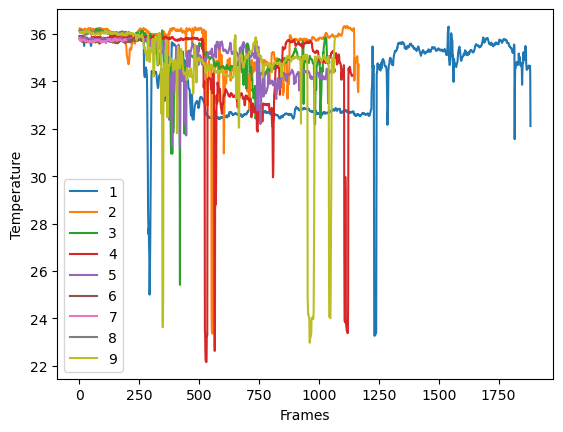

In [78]:
stage = 0
for i in data:
    plt.plot(i["frame_number"],i['temp_C'], label= stage+1)
    stage = stage +1

plt.legend()
plt.xlabel("Frames")
plt.ylabel("Temperature")
plt.show()

<AxesSubplot:>

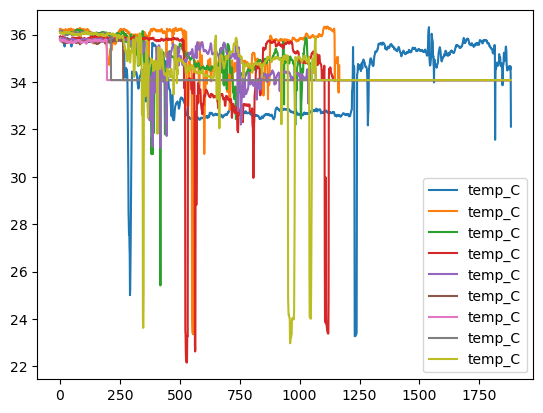

In [71]:
df.fillna(df.mean()).plot()

